# **Milestone** | Planetary Weather Data Analysis

<div style="text-align: center;">
<img src="https://www.nasa.gov/wp-content/uploads/2023/04/nasa-logo-web-rgb.png" alt="NASA Logo" width="320"/>
</div>

## Introduction

In this Milestone, you'll role play as an intern at NASA, where you'll work to analyze weather data collected from a planetary rover. The dataset, `planet_weather.csv` contains atmospheric measurements from a planet in our solar system, but the planet's identity has not been disclosed. Your objective is to apply data inspection, cleaning, and analysis techniques to draw conclusions about the planet based on the provided weather data.


The dataset, located in the `datasets/` folder is called `planet_weather.csv`, and it contains the following information:

- **terrestrial_date**: Date on planet Earth, captured as `yyyy-mm-dd`.

- **sol**: number of elapsed planetary days since beginning measurement.

- **ls**: solar longitude. 0: fall equinox. 90: winter solstice. 180: spring equinox. 270: summer solstice.

- **month**: the month number on the mystery planet.

- **min_temp**: the minimum temperature, in Celsius, during a single day.

- **pressure**: atmospheric pressure, in Pascals

- **wind_speed**: average wind speed, in meters per second.

- **atmo_opacity**: atmospheric opacity.


To start, import both the pandas and plotly.express libraries, and load the data into a DataFrame.


In [3]:
# import pandas and plotly express libraries
import pandas as pd
import plotly.express as px

In [4]:
# load planet_weather.csv data from datasets folder
df = pd.read_csv('datasets/planet_weather.csv')

## Task 1: Data Inspection 🔍

Before analyzing anything, it's essential to understand the structure and contents of your dataset. You'll start by previewing the data and checking for missing values or unusual patterns.


In [5]:
# preview the data
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,max_temp,pressure,wind_speed,atmo_opacity
0,1895,2018-02-27,1977,135,Month 5,-77.0,-10.0,727.0,NaN,Sunny
1,1893,2018-02-26,1976,135,Month 5,-77.0,-10.0,728.0,NaN,Sunny
2,1894,2018-02-25,1975,134,Month 5,-76.0,-16.0,729.0,NaN,Sunny
3,1892,2018-02-24,1974,134,Month 5,-77.0,-13.0,729.0,NaN,Sunny
4,1889,2018-02-23,1973,133,Month 5,-78.0,-18.0,730.0,NaN,Sunny


**1.** How many rows and columns are there in the dataset?

In [6]:
# dataset rows and columns
df.shape

(1894, 10)

**2.** What are the names of all the columns?

In [7]:
# dataset columns
df.columns

Index(['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'max_temp',
       'pressure', 'wind_speed', 'atmo_opacity'],
      dtype='object')

**3.** What is the data type of each column?

<div style="border: 3px solid #b67ae5; background-color: #f9f1ff; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
<span style="font-size: 10pt;">
<strong>Hint: </strong>There are a few ways to do this! Both .info and .dytpes will work.
</span>
</div>

In [8]:
# data types of each column
df.dtypes


id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                object
min_temp            float64
max_temp            float64
pressure            float64
wind_speed          float64
atmo_opacity         object
dtype: object

**4.** How many null values are there in each column? For each column, sum up the number of null values.

In [9]:
# null values in each column
df.isnull().sum()

id                     0
terrestrial_date       0
sol                    0
ls                     0
month                  0
min_temp              27
max_temp              27
pressure              27
wind_speed          1894
atmo_opacity           0
dtype: int64

**5.** Provide a statistical summary of the DataFrame.

In [10]:
# Statistical summary of the DataFrame
df.describe()

,id,sol,ls,min_temp,max_temp,pressure,wind_speed
count,1894.000000,1894.000000,1894.000000,1867.000000,1867.000000,1867.000000,0.0
mean,948.372228,1007.930306,169.180570,-76.121050,-12.510445,841.066417,NaN
std,547.088173,567.879561,105.738532,5.504098,10.699454,54.253226,NaN
min,1.000000,1.000000,0.000000,-90.000000,-35.000000,727.000000,NaN
25%,475.250000,532.250000,78.000000,-80.000000,-23.000000,800.000000,NaN
50%,948.500000,1016.500000,160.000000,-76.000000,-11.000000,853.000000,NaN
75%,1421.750000,1501.750000,259.000000,-72.000000,-3.000000,883.000000,NaN
max,1895.000000,1977.000000,359.000000,-62.000000,11.000000,925.000000,NaN


**6.** Based on the dataset’s shape, column types, and statistical summary, what initial observations can you make about the data’s structure, completeness, and potential quality issues?

<div style="border: 3px solid #30EE99; background-color: #f0fff4; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
  <span style="font-size: 10pt;">
    <strong>Try This AI Prompt:</strong> Summarize key things a data analyst should look for when reviewing .shape, .info(), and .describe() outputs from a new dataset.
  </span>
</div>

The dataset contains 1,894 rows and 10 columns, with a mix of numeric and object data types. Most columns are complete, but wind_speed is entirely missing and should be dropped. Additionally, min_temp, max_temp, and pressure each have 27 missing values, which represents a small portion of the dataset and can likely be handled through cleaning. The temperature values indicate an extremely cold environment, while the atmospheric pressure is significantly lower than Earth’s, suggesting the data is from a different planet. The atmo_opacity column has no missing values, but further inspection is needed to assess its usefulness.


## Task 2: Data Cleaning
Now that you’ve inspected the data, your next step is to check for any columns that might need to be cleaned or removed.

**1.** Are there any columns with mostly missing values? Perhaps the wind speed sensor was broken! Remove this column from the dataframe.

In [11]:
# Delete wind_speed column, which is filled with null values
df.drop(columns='wind_speed', inplace=True)


**2A.** Now, check for columns that might not add much value to your analysis.

Are there any columns where almost every value is the same?

Take a close look at the `atmo_opacity` column. How many unique values are there? How frequent are they?

<div style="border: 3px solid #b67ae5; background-color: #f9f1ff; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
<span style="font-size: 10pt;">
<strong>Hint: </strong>Both .nunique and .value_counts will work here!
</span>
</div>

In [12]:
# How many unique values are there in the atmo_opacity column?
df['atmo_opacity'].value_counts()
df['atmo_opacity'].nunique()

2

**2B.** The atmosphere sensors seem to have been faulty and did not capture accurate data. Drop this column, which contains identical values.

In [13]:
# Drop the atmo_opacity column
df.drop(columns='atmo_opacity', inplace=True)

# Task 3: Data Analysis & Visualization

Let’s explore trends in the planetary weather using groupings and charts. This will help you uncover seasonal patterns and key environmental characteristics of the mystery planet.

You’ll need to use the `.groupby()` method here to analyze how temperature and pressure vary across months. Store your grouped results in new DataFrames to make them easier to visualize.

**1.** How many months are there on this planet?

In [14]:
# Number of unique months
df['month'].nunique()

12

**2A.** What is the average minimum temperature for each month?

In [15]:
# Average min_temp each month
avg_temp_by_month = df.groupby('month')['min_temp'].mean().reset_index()
avg_temp_by_month

,month,min_temp
0,Month 1,-77.160920
1,Month 10,-71.982143
2,Month 11,-71.985507
3,Month 12,-74.451807
4,Month 2,-79.932584
5,Month 3,-83.307292
6,Month 4,-82.747423
7,Month 5,-79.308725
8,Month 6,-75.299320
9,Month 7,-72.281690


**2B.** Using your grouped results above to plot a bar chart of the average minimum temperature by month.

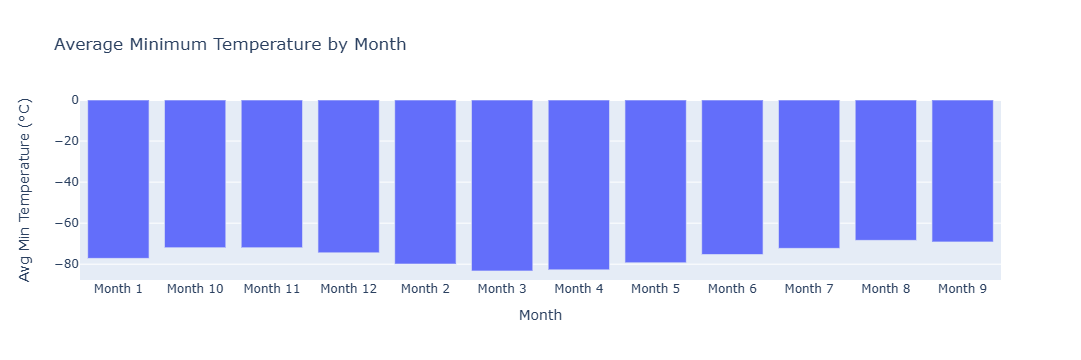

In [21]:
# Bar chart of the average min_temp by month
import plotly.express as px
fig = px.bar(avg_temp_by_month,
             x='month',
             y='min_temp',
             title='Average Minimum Temperature by Month',
             labels={'month': 'Month', 'min_temp': 'Avg Min Temperature (°C)'},
             category_orders={'month': sorted(df['month'].unique())})  
fig.show()

<div style="border: 3px solid #30EE99; background-color: #f0fff4; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
  <span style="font-size: 10pt;">
    <strong>Try This AI Prompt:</strong> In my Plotly Express bar chart, the x-axis shows months but they're sorted alphabetically (Month 1, Month 10, Month 11, etc.) instead of Month 1 - Month 12 order. How can I replot my data so that the x-axis sorts numerically by month?
  </span>
</div>

**2C.** Based on the minimum temperature, what is the coldest month? What is the warmest month?

Based on the average minimum temperature values, the coldest month is Month 3 with approximately -83.31°C, followed closely by Month 4. The warmest month is Month 8, with an average minimum temperature of around -68.38°C. This suggests a seasonal warming trend in the middle of the year, followed by a sharp drop in temperature entering Month 3.


**3A.** What is the average pressure for each month?

In [18]:
# What is the average pressure for each month?
avg_pressure_by_month = df.groupby('month')['pressure'].mean().reset_index()
avg_pressure_by_month

,month,pressure
0,Month 1,862.488506
1,Month 10,887.312500
2,Month 11,857.014493
3,Month 12,842.156627
4,Month 2,889.455056
5,Month 3,877.322917
6,Month 4,806.329897
7,Month 5,748.557047
8,Month 6,745.054422
9,Month 7,795.105634


**3B.** Using your grouped results above to plot a bar chart of the average atmospheric pressure by month.

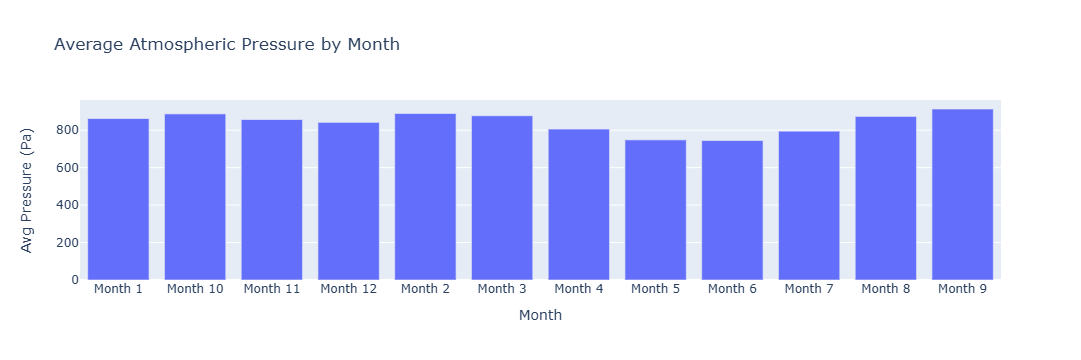

In [20]:
# Bar chart of the average atmospheric pressure by month
fig = px.bar(
    avg_pressure_by_month,
    x='month',
    y='pressure',
    title='Average Atmospheric Pressure by Month',
    labels={'month': 'Month', 'pressure': 'Avg Pressure (Pa)'},
    category_orders={'month': sorted(df['month'].unique())} 
)

fig.show()

**4.** Plot a line chart of the daily atmospheric pressure by terrestrial date.

<div style="border: 3px solid #b67ae5; background-color: #f9f1ff; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
<span style="font-size: 10pt;">
<strong>Note: </strong>You do not need to modify the dataframe or group any data! Just use the original data.
</span>
</div>

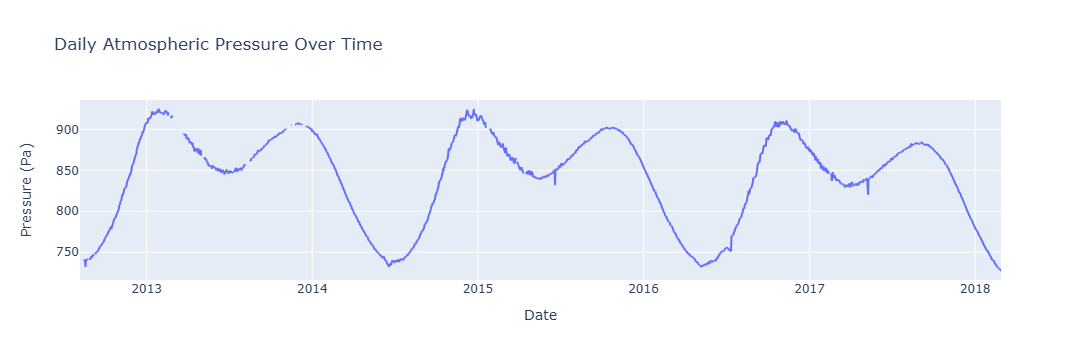

In [22]:
# Line chart of the daily atmospheric pressure by terrestrial date
fig = px.line(
    df,
    x='terrestrial_date',
    y='pressure',
    title='Daily Atmospheric Pressure Over Time',
    labels={'terrestrial_date': 'Date', 'pressure': 'Pressure (Pa)'}
)
fig.show()


**5.** Plot a line chart the daily minimum temp.

<div style="border: 3px solid #b67ae5; background-color: #f9f1ff; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
<span style="font-size: 10pt;">
<strong>Note: </strong>You do not need to modify the dataframe or group any data! Just use the original data.
</span>
</div>

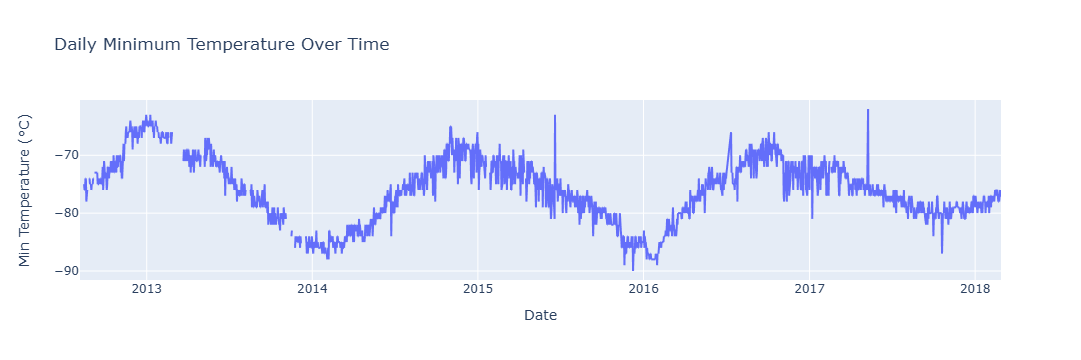

In [27]:
# Line chart the daily minimum temp
fig = px.line(
    df,
    x='terrestrial_date',
    y='min_temp',
    title='Daily Minimum Temperature Over Time',
    labels={'terrestrial_date': 'Date', 'min_temp': 'Min Temperature (°C)'}
)
fig.show()

**6.** Based on this information, approximately how many earth days are there in a year on this planet?

<div style="border: 3px solid #b67ae5; background-color: #f9f1ff; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
<span style="font-size: 10pt;">
<strong>Hint: </strong>To do this, get an approximate range for how long a "year" is on this planet by looking at the plot of either the atmospheric pressure or the temperature by day. Use the visualization to get a *rough estimate* between matching "peaks".
</span>
</div>


650–700 Earth days (around 675)

**7.** What is the identity of the planet? Go to [this wesbsite](https://spaceplace.nasa.gov/years-on-other-planets/en/) and see what planet this lines up with!

Mars

### Congratulations on making your first extra-terrestrial discovery!
<div style="text-align: center;">
<img src="https://media.giphy.com/media/5ndfKr0Nv92LkWrKpU/giphy.gif" alt="gif of clapping" width="320"/>
</div>

# LevelUp

Earlier in the milestone you investigated how many months were in our Mystery Planet. Unfortunately, the answer (12) was not very satisfying. This is because there is no standard calendar for Mars. When the data was collected, they used 12 "months" though each month is longer than a typical Earth month. Let's investigate!

First, filter your dataset so that you are only looking at any `terrestrial_date` before 2014.

<div style="border: 3px solid #b67ae5; background-color: #f9f1ff; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
<span style="font-size: 10pt;">
<strong>Hint: </strong>Since the <span style="font-family: monospace; color: #222;">terrestrial_date</span> is a <span style="font-family: monospace; color: #222;">string</span> data type, this is simply checking for all values that satisfy the condition <span style="font-family: monospace; color: #222;">< '2014'</span> (don't forget the quotation marks!)
</span>
</div>

In [25]:
# filter to all values where terrestrial_date is before 2014
# store it in a new variable.
df_before_2014 = df[df['terrestrial_date'] < '2014']
# show dataframe
df_before_2014



,id,terrestrial_date,sol,ls,month,min_temp,max_temp,pressure
1453,432,2013-12-31,499,69,Month 3,-84.0,-30.0,899.0
1454,424,2013-12-30,498,69,Month 3,-86.0,-28.0,901.0
1455,425,2013-12-29,497,69,Month 3,-86.0,-30.0,901.0
1456,428,2013-12-28,496,68,Month 3,-85.0,-26.0,901.0
1457,431,2013-12-27,495,68,Month 3,-86.0,-26.0,900.0
...,...,...,...,...,...,...,...,...
1889,24,2012-08-18,12,156,Month 6,-76.0,-18.0,741.0
1890,13,2012-08-17,11,156,Month 6,-76.0,-11.0,740.0
1891,2,2012-08-16,10,155,Month 6,-75.0,-16.0,739.0
1892,232,2012-08-15,9,155,Month 6,NaN,NaN,NaN


<div style="border: 3px solid #f8c43e; background-color: #fff3c1; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
  <span style="font-size: 10pt;">
      If done correctly, you will have a dataframe with <strong>441 rows</strong>
  </span>
</div>

Lastly, for each month in the dataframe, return both the `min` value and the `max` value of the `terrestrial_date` field.

<div style="border: 3px solid #b67ae5; background-color: #f9f1ff; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
<span style="font-size: 10pt;">
<strong>Hint #1: </strong>You'll need to use Use <span style="font-family: monospace; color: #222;">.groupby()</span>
</span>
</div>

<br>

<div style="border: 3px solid #b67ae5; background-color: #f9f1ff; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
<span style="font-size: 10pt;">
<strong>Hint #1: </strong>In the dictionary for your <span style="font-family: monospace; color: #222;">.agg()</span> function, pass a list of values. e.g. <span style="font-family: monospace; color: #222;">{col_to_check: [func1, func2]}</span>. Remember to use the appropriate values / variables from the dataframe and the desired functions.
</span>
</div>

In [26]:
# For each month, calculate the minimum AND maximum terrestrial_date
df_before_2014.groupby('month').agg({'terrestrial_date': ['min', 'max']})

terrestrial_date            
                      min         max
month                                
Month 1        2013-08-01  2013-10-02
Month 10       2013-02-24  2013-04-12
Month 11       2013-04-13  2013-06-04
Month 12       2013-06-05  2013-07-31
Month 2        2013-10-03  2013-12-08
Month 3        2013-12-09  2013-12-31
Month 6        2012-08-07  2012-09-29
Month 7        2012-09-30  2012-11-19
Month 8        2012-11-20  2013-01-07
Month 9        2013-01-08  2013-02-23

How many Earth days, roughly, are there in each "month" in the mystery planet? Does that lineup with what you expected now that you know the identity of the mystery planet?

Each “month” on the mystery planet lasts roughly 57–66 Earth days based on the difference between the minimum and maximum terrestrial dates shown for each month. When averaged, most months span around 59 Earth days, which adds up to approximately 708 Earth days for a full year. This closely aligns with Mars, whose year lasts about 687 Earth days, confirming that the month structure observed in the data is consistent with Mars being the identity of the mystery planet.
